# Exploratory Data Analysis

## Importing and formatting the Data

In [1]:
# Importing the secessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv file into pandas dataframe
df = pd.read_csv("./AQI_data.csv")
df = df.loc[:,['timestamp','PM2.5 ug/m3','CO ppm', 'CO2 ppm']]
df_size = len(df)
df

,timestamp,PM2.5 ug/m3,CO ppm,CO2 ppm
0,6/5/2019 1:00,29.95,NaN,NaN
1,6/5/2019 2:00,28.35,NaN,NaN
2,6/5/2019 3:00,32.55,NaN,NaN
3,6/5/2019 4:00,39.73,NaN,NaN
4,6/5/2019 5:00,33.58,NaN,NaN
...,...,...,...,...
26886,29/06/2022 07:00,6.80,10.57,415.14
26887,29/06/2022 08:00,7.30,10.03,413.11
26888,29/06/2022 09:00,12.85,11.40,419.65
26889,29/06/2022 10:00,8.75,11.40,426.25


In [2]:
# Converting timestamp column to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp']


0       2019-06-05 01:00:00
1       2019-06-05 02:00:00
2       2019-06-05 03:00:00
3       2019-06-05 04:00:00
4       2019-06-05 05:00:00
                ...        
26886   2022-06-29 07:00:00
26887   2022-06-29 08:00:00
26888   2022-06-29 09:00:00
26889   2022-06-29 10:00:00
26890   2022-06-29 11:00:00
Name: timestamp, Length: 26891, dtype: datetime64[ns]

In [3]:
# Setting the timestamp column as the index of the DataFrame
df.set_index('timestamp',inplace=True)
df

,PM2.5 ug/m3,CO ppm,CO2 ppm
timestamp,,,
2019-06-05 01:00:00,29.95,NaN,NaN
2019-06-05 02:00:00,28.35,NaN,NaN
2019-06-05 03:00:00,32.55,NaN,NaN
2019-06-05 04:00:00,39.73,NaN,NaN
2019-06-05 05:00:00,33.58,NaN,NaN
...,...,...,...
2022-06-29 07:00:00,6.80,10.57,415.14
2022-06-29 08:00:00,7.30,10.03,413.11
2022-06-29 09:00:00,12.85,11.40,419.65


## Handling Missing Values

In [4]:
# Interpolating the missing values (based on the value of the neighbors)
feature = 'PM2.5 ug/m3'
print(df[feature].isnull().sum())
df[feature] = df[feature].interpolate(method='time', axis=0)
print(df[feature].isnull().sum())

669
0


## Time Series Plot

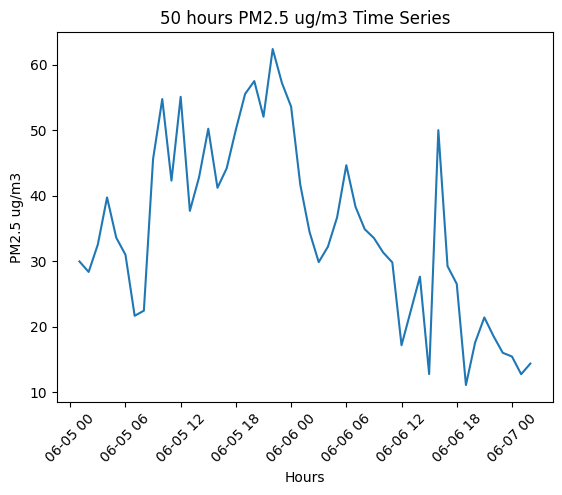

In [5]:
# Creating a time series plot using Matplotlib
hours = 50
plt.plot(df.index[0:hours], df[feature][0:hours])
plt.xlabel('Hours')
plt.ylabel(feature)
plt.title(str(hours) + ' hours '+ feature +' Time Series')
plt.xticks(rotation=45)
plt.show()

## Moving Average Plot

In [6]:
# Creating a rolling window of a specified size and 
# calculate the moving average of the feature values
hours = 300
window_size = 50  # set the window size to 30 hours
rolling_avg = df[feature][:hours].rolling(window = window_size,min_periods = 5).mean()
rolling_avg


timestamp
2019-06-05 01:00:00        NaN
2019-06-05 02:00:00        NaN
2019-06-05 03:00:00        NaN
2019-06-05 04:00:00        NaN
2019-06-05 05:00:00    32.8320
                        ...   
2019-06-17 08:00:00    34.9514
2019-06-17 09:00:00    34.9154
2019-06-17 10:00:00    35.0818
2019-06-17 11:00:00    35.2288
2019-06-17 12:00:00    35.4768
Name: PM2.5 ug/m3, Length: 300, dtype: float64

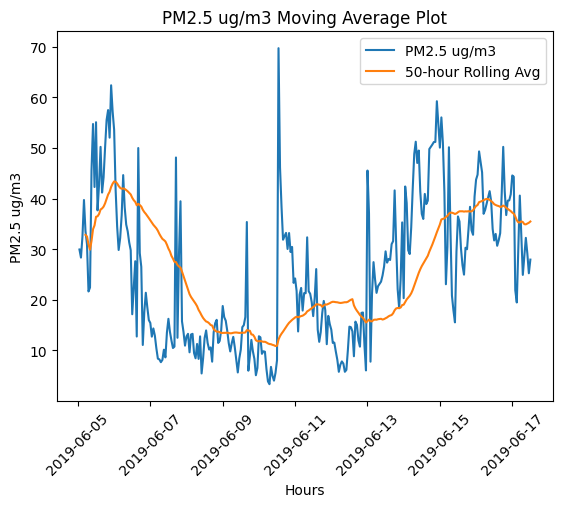

In [7]:
# Create a line plot of the original PM2.5 values and 
# the rolling average values
plt.plot(df.index[:hours], df[feature][:hours], label=feature)
plt.plot(rolling_avg.index, rolling_avg[:hours], label=f'{window_size}-hour Rolling Avg')
plt.xlabel('Hours')
plt.ylabel(feature)
plt.title(feature +' Moving Average Plot')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Handling the Outliers

No. of outliers detected = 183


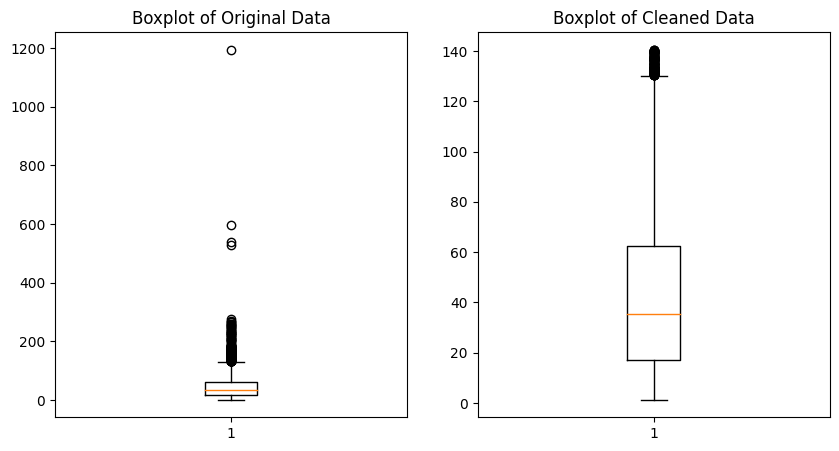

In [8]:
import numpy as np

# Boxplot of original data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].boxplot(df[feature])
axes[0].set_title('Boxplot of Original Data')

# Calculate z-scores for the PM2.5 values
z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

# Define a threshold for outlier detection
z_threshold = 3

# Identify outliers
outliers = df[z_scores > z_threshold]
print("No. of outliers detected =",len(outliers))
# Remove outliers from the data
df = df[z_scores <= z_threshold]

# Boxplot of cleaned data
axes[1].boxplot(df[feature])
axes[1].set_title('Boxplot of Cleaned Data')

plt.show()

## Linear Regression Plot

300 300


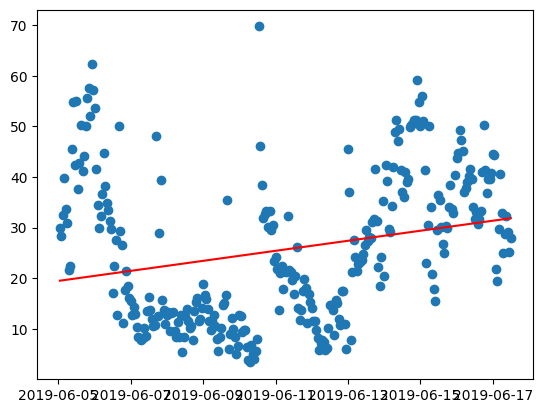

In [9]:
import numpy as np
# Plotting linear regression for Moving Average Values
hours = 300
plt.scatter(df.index[:hours],df[feature][:hours])
# Fit a straight line to the data using polyfit()
x = np.arange(hours)
y = df[feature][:hours]
print(len(x),len(y))
slope, intercept = np.polyfit(x, y, 1)

# Plot the linear regression line using plot()
plt.plot(df.index[:hours], slope*x + intercept, color='red')

plt.show()

## Seasonal Subseries Plot

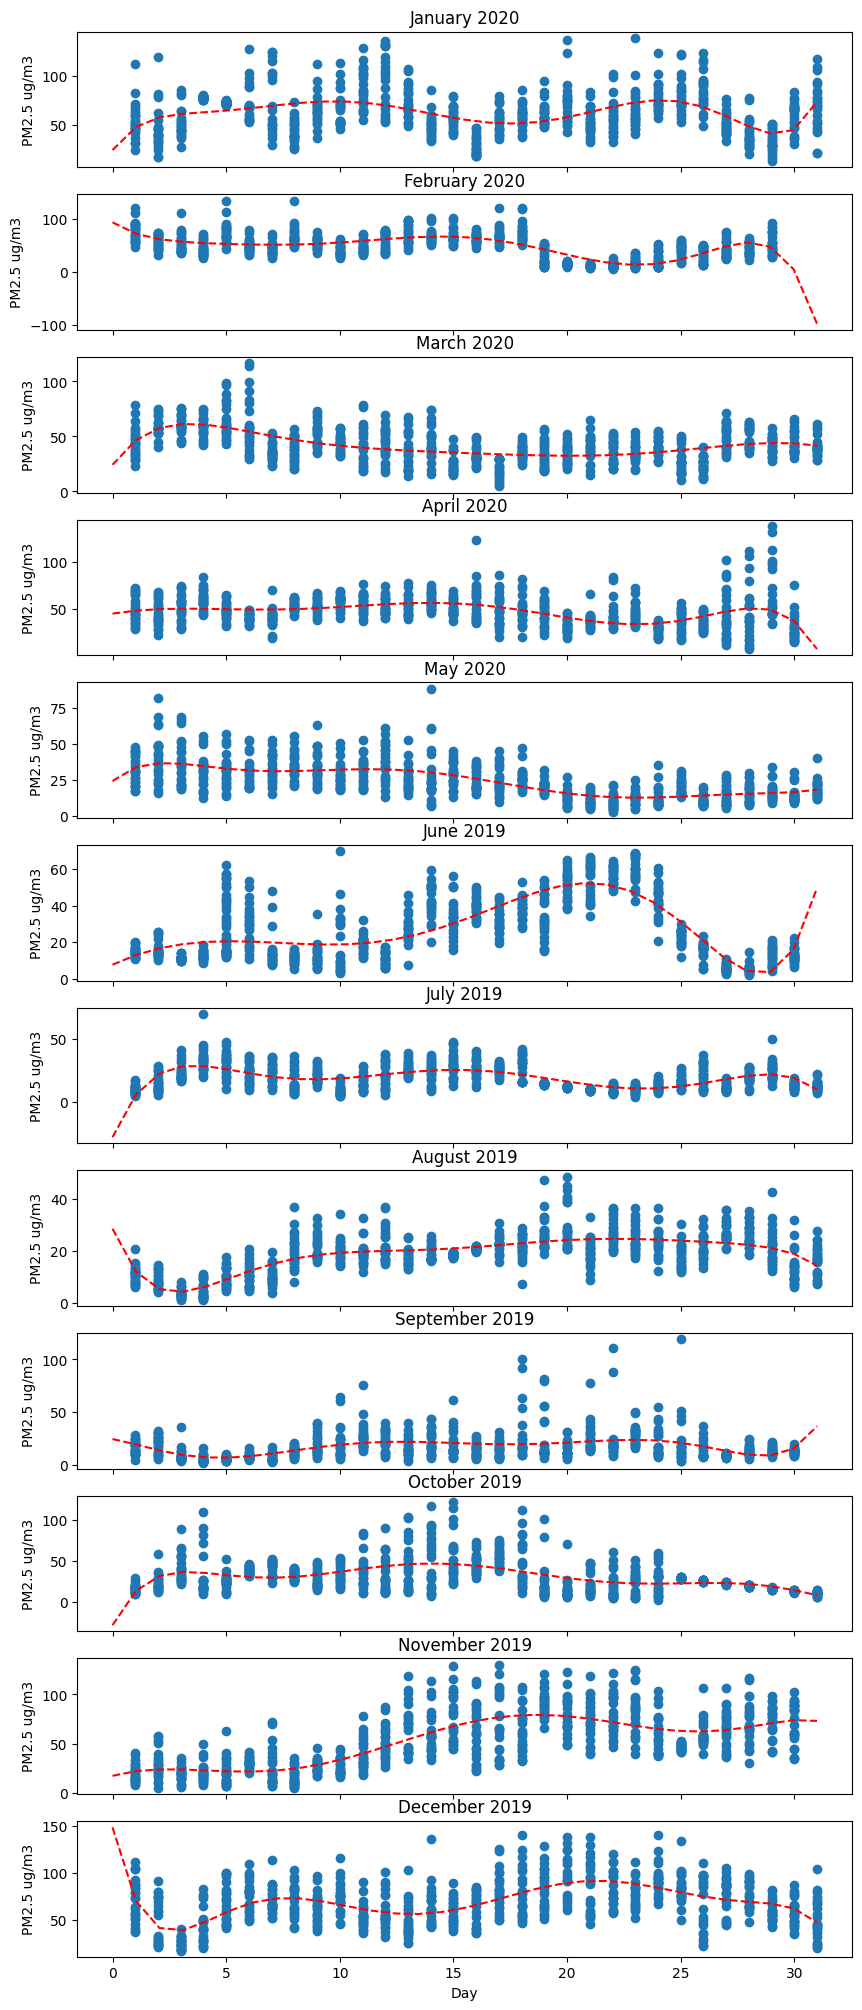

In [10]:
fig, axes = plt.subplots(nrows=12, figsize=(10, 25), sharex=True)
hours = 365*24
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
oneYearData = df[:hours]
polyline = np.linspace(start=0, stop=31, num=31)

for i, month in enumerate(range(1,13)):
    df_month = oneYearData[oneYearData.index.month == month]

    model = np.poly1d(np.polyfit(df_month.index.day, df_month[feature], 7))

    axes[i].scatter(df_month.index.day, df_month[feature])
    axes[i].set_title(f"{months[month-1]} {df_month.index.year[0]}")
    axes[i].set_ylabel(f"{feature}")
    axes[i].plot(polyline, model(polyline), '--', color='red')

    
    
plt.xlabel('Day')
plt.show()

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


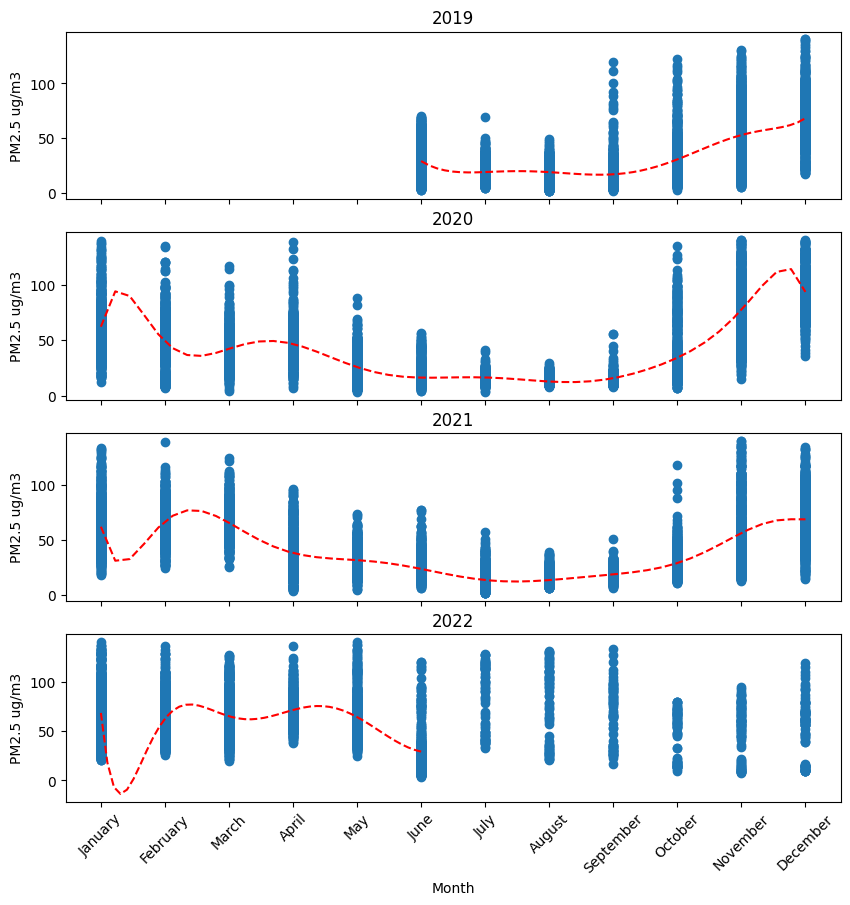

In [11]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 10), sharex=True)
years = ['2019','2020','2021','2022']


for i in range(0,4):
    df_year = df[df.index.year == 2019 + i]

    polyline = np.linspace(start=df_year.index.month[0], stop=df_year.index.month[-1])
    model = np.poly1d(np.polyfit(df_year.index.month, df_year[feature], 10))

    axes[i].scatter(df_year.index.month, df_year[feature])
    axes[i].set_title(f"{years[i]}")
    axes[i].set_ylabel(f"{feature}")
    axes[i].plot(polyline, model(polyline), '--', color='red')

plt.xlabel('Month')
plt.xticks(np.arange(1,13), months, rotation=45)
plt.show()

## Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df);
print(data_normalized)

[[0.20583375        nan        nan]
 [0.19433867        nan        nan]
 [0.22451326        nan        nan]
 ...
 [0.0829801  0.34715026 0.49328797]
 [0.05352396 0.34715026 0.50542479]
 [0.04454343 0.34105456 0.49593601]]


In [13]:
data_normalized_df = pd.DataFrame(data_normalized,columns=df.columns,index=df.index)
data_normalized_df

,PM2.5 ug/m3,CO ppm,CO2 ppm
timestamp,,,
2019-06-05 01:00:00,0.205834,NaN,NaN
2019-06-05 02:00:00,0.194339,NaN,NaN
2019-06-05 03:00:00,0.224513,NaN,NaN
2019-06-05 04:00:00,0.276097,NaN,NaN
2019-06-05 05:00:00,0.231913,NaN,NaN
...,...,...,...
2022-06-29 07:00:00,0.039514,0.321853,0.484994
2022-06-29 08:00:00,0.043107,0.305395,0.481261
2022-06-29 09:00:00,0.082980,0.347150,0.493288


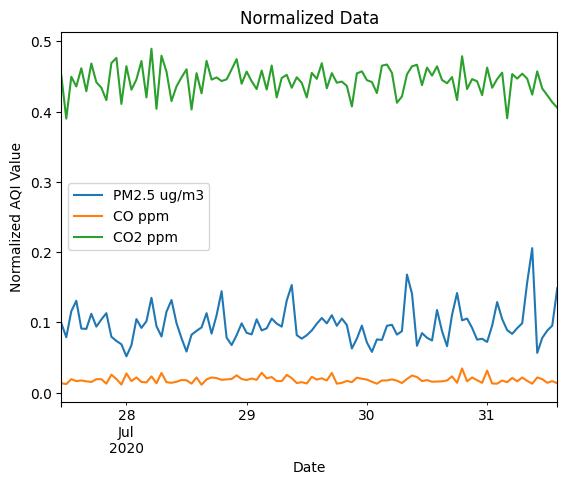

In [14]:
hours = 100
data_normalized_df[10000:10000+hours].plot()
plt.title('Normalized Data')
plt.xlabel('Date')
plt.ylabel('Normalized AQI Value')
plt.show()


## Training Time Series Forecasting Models
### 1. ARIMA

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monoto

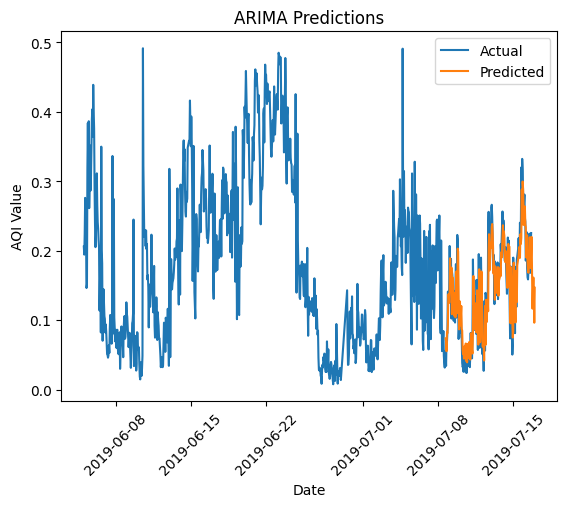

In [15]:
import statsmodels.api as sm

# Fit an ARIMA model to the data
model_arima = sm.tsa.arima.ARIMA(data_normalized_df[:]['PM2.5 ug/m3'], order=(1, 1, 1))
fitted_model_arima = model_arima.fit()

# Make predictions on the data
start_date = '2019-06-16'
end_date = '2019-07-17'
predictions_arima = fitted_model_arima.predict(start=start_date, end=end_date, typ='levels')

# Plot the original data and the predicted values
plt.plot(data_normalized_df.index[:1000], data_normalized_df[:1000]['PM2.5 ug/m3'], label='Actual')
plt.plot(predictions_arima.index[-200:], predictions_arima[-200:], label='Predicted')
plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('AQI Value')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(data_normalized_df.loc[start_date:end_date, 'PM2.5 ug/m3'][:745], predictions_arima)
rmse = mean_squared_error(data_normalized_df.loc[start_date:end_date, 'PM2.5 ug/m3'][:745], predictions_arima, squared=False)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Absolute Error:  0.03285700511540122
Root Mean Squared Error:  0.04648144594103032


### 2. SARIMA

In [17]:
import statsmodels.api as sm

# Fit an ARIMA model to the data
model_sarima = sm.tsa.statespace.SARIMAX(data_normalized_df[:]['PM2.5 ug/m3'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model_sarima = model_sarima.fit()

# Make predictions on the data
start_date = '2021-07-07'
end_date = '2022-03-17'
predictions_sarima = fitted_model_sarima.predict(start=start_date, end=end_date, typ='levels')



c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monoto

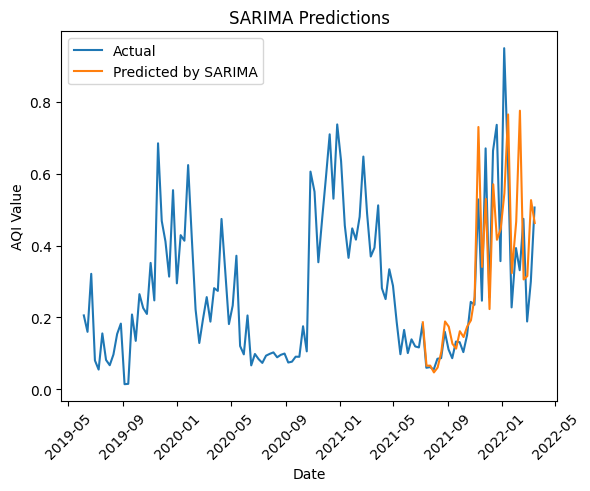

In [18]:
# Plot the original data and the predicted values
plt.plot(data_normalized_df.index[:-2500:200], data_normalized_df[:-2500:200]['PM2.5 ug/m3'], label='Actual')
plt.plot(predictions_sarima.index[::200], predictions_sarima[::200], label='Predicted by SARIMA')
plt.title('SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
mae = mean_absolute_error(data_normalized_df.loc[start_date:end_date, 'PM2.5 ug/m3'][:745], predictions_sarima[:745])
rmse = mean_squared_error(data_normalized_df.loc[start_date:end_date, 'PM2.5 ug/m3'][:745], predictions_sarima[:745], squared=False)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Absolute Error:  0.012552662616918488
Root Mean Squared Error:  0.01724893433559079


### 3. Prophet

01:01:38 - cmdstanpy - INFO - Chain [1] start processing
01:01:58 - cmdstanpy - INFO - Chain [1] done processing


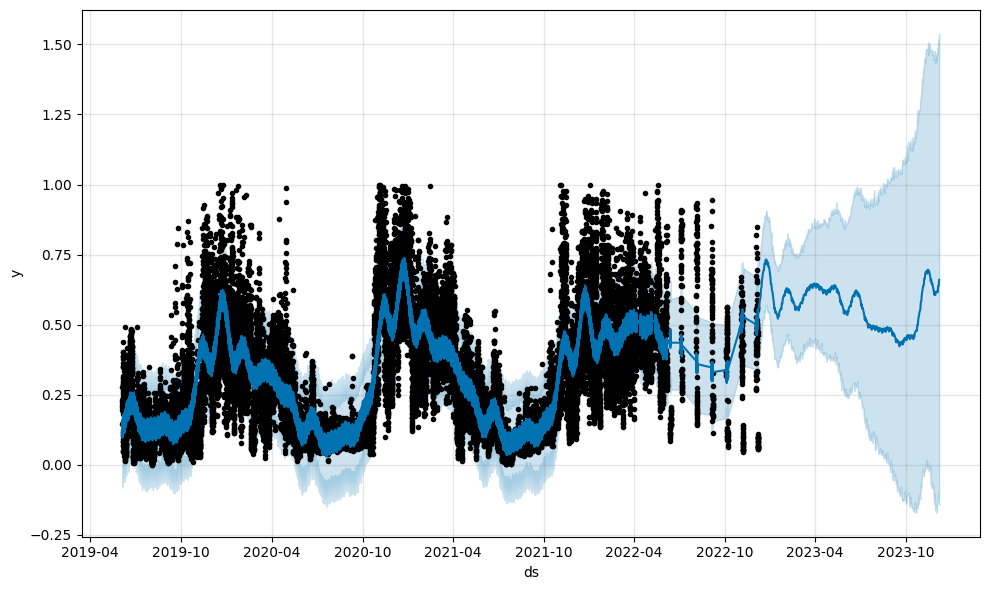

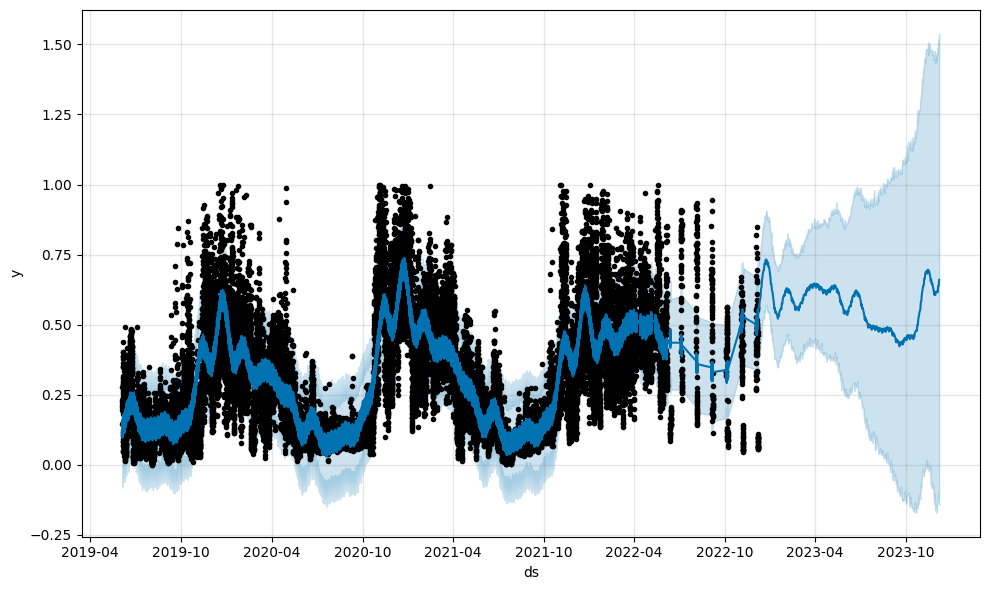

In [55]:
from prophet import Prophet
data = data_normalized_df.rename(columns={'PM2.5 ug/m3':'y'})
data['ds'] = data_normalized_df.index
data = data.reset_index(drop=True)

# Define the train and test datasets
train = data[:-365]
test = data[-365:]

# Define and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(train)

# Make predictions for the next year
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)

# Plot the forecast and the actual data
model_prophet.plot(forecast)
# data

In [60]:
predictions = forecast[-365:]['yhat']

# Calculate MAE and RMSE for the test dataset
mae = mean_absolute_error(test['y'][-745:], predictions[-745:])
rmse = mean_squared_error(test['y'][-745:], predictions[-745:], squared=False)

print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Absolute Error:  0.46347714818556385
Root Mean Squared Error:  0.47009525603664953
